# An Analysis of London Underground Exit Data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Below is the initial dataframe that we will work with. It displays the stations as rows with the number of exits within the hour as columns. I have added a column on the end which has summed all of the rows to provide a total per station within this specific day. 

In [3]:
exits = pd.read_csv('hourlyExits.csv')
exits = exits.set_index('Station')
exits['total'] = exits.sum(axis=1)
exits

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H17,H18,H19,H20,H21,H22,H23,H00,H01,total
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,917,1077,793,505,424,424,366,210,54,9362
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,1116,1155,566,331,260,237,171,58,0,16136
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,1263,1605,1127,708,560,532,457,239,26,21206
Alperton,16,101,230,372,254,149,137,152,176,205,...,679,724,424,222,161,143,146,72,6,5118
Amersham,3,18,82,246,96,56,48,62,75,94,...,409,692,540,287,182,154,175,99,6,3905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,364,467,333,183,146,139,108,53,10,3296
Wood Green,17,154,450,831,884,557,528,604,705,802,...,2334,2606,1802,1123,862,799,773,497,78,18989
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,665,646,354,187,117,101,71,28,4,6610


Below I have simplified and summed the AM hours of 'H07', 'H08' and 'H09' as well as the PM hours of 'H16', 'H17' and 'H18'. I have then calculated each stations relative proportions to their total number of exits in the day. For example, Aldgate's traffic within the AM hours account for 45.9% of it's daily traffic, with 18.5% of it's traffic occurring in the PM hours. Using proportions makes it very clear to see which stations have a higher amount of traffic in the morning compared to the evening and may help us identify which stations are primarily used for work and which are either residential or potentially tourist or other.

In [4]:
peak_counts = exits.copy()
peak_counts = peak_counts[['H07', 'H08', 'H09', 'H16', 'H17', 'H18']]
peak_counts['AM_peak'] = sum([peak_counts.H07,peak_counts.H08,peak_counts.H09])
peak_counts['PM_peak'] = sum([peak_counts.H16,peak_counts.H17,peak_counts.H18])
peak_counts = peak_counts.drop(columns=['H07', 'H08', 'H09', 'H16', 'H17', 'H18'])
peak_counts['total'] = exits.total
peak_counts['AM_prop'] = peak_counts.AM_peak/peak_counts.total
peak_counts['PM_prop'] = peak_counts.PM_peak/peak_counts.total
peak_counts = peak_counts[['AM_peak', 'PM_peak', 'AM_prop', 'PM_prop', 'total']]


peak_counts

,AM_peak,PM_peak,AM_prop,PM_prop,total
Station,,,,,
Acton Town,1970,2628,0.210425,0.280709,9362
Aldgate,7408,2992,0.459098,0.185424,16136
Aldgate East,7618,3803,0.359238,0.179336,21206
Alperton,856,1847,0.167253,0.360883,5118
Amersham,424,1465,0.108579,0.375160,3905
...,...,...,...,...,...
Wimbledon Park,497,1114,0.150789,0.337985,3296
Wood Green,2165,6494,0.114013,0.341987,18989
Wood Lane,1798,1766,0.272012,0.267171,6610


Below I have a table describing all the summary statistics of the above data. Within the AM_prop column we can see that the mean is higher than the median by around 0.04, this could suggest that the AM is positively skewed, while the PM_prop mean and median are very near to one another, suggesting that the PM could be normally distributed. The standard deviations of both PM and AM proportions are different too, with the AM being higher so suggesting that the values are more spread out from the mean, while the PM standard deviation is lower implying that the values are clustered closer to the mean. \
The AM minimum value is 0.04 which is lower than the PM minimum value of 0.08. The AM maximum value of 0.63 is also quite a lot higher than both the PM maximum value of 0.49 as well as the AM's own 75th percentile value of 0.26. This could imply that the AM hours have a number of outliers in comparison to the PM hours where the data appears to be more stable as there is not such a large jump between the maximum value (0.49) and the 75th percentile (0.36). 

In [5]:
peak_counts.describe()

,AM_peak,PM_peak,AM_prop,PM_prop,total
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,0.207132,0.298750,17194.477612
std,8181.784059,6276.463316,0.122161,0.087724,23480.190142
min,27.000000,239.000000,0.045302,0.084630,596.000000
25%,677.500000,1471.750000,0.116120,0.240947,4889.500000
50%,1517.000000,2622.000000,0.169378,0.307397,9210.000000
75%,4315.250000,4707.750000,0.266443,0.361596,19999.500000
max,61116.000000,59486.000000,0.630427,0.496079,149258.000000


Below are 2 histograms comparing the distributions of the AM proportion and PM proportion. \
The AM histogram is very positively skewed with a larger number of values centered around 0.1. Tube stations that see heavy traffic in the morning are usually used for workers. This histogram could imply that the majority of London tube stations are not used for work and therefore many of them will have low numbers of people using them. You can see that as the proportion increases the frequency decreases which would suggest that there are a small number of stations that have heavier usage in the mornings which would correlate to there being less central tube stations. \
The PM histogram is closer to being normally distributed with the values centered around a proportion of 0.3. This shows that most stations have a higher proportion of exits in the PM peak and could imply that the majority of tube stations are not work related, they could be residential or somewhere in between which see more usage later in the evening for non-work related activities. You could expect both these histograms to be mirror images of one another, however if there are many more residential tube stations than work tube stations then the residential tube stations may outweigh the lower PM proportions of the work tube stations and bring the distribution closer to normal, rather than being negatively skewed as you may expect.

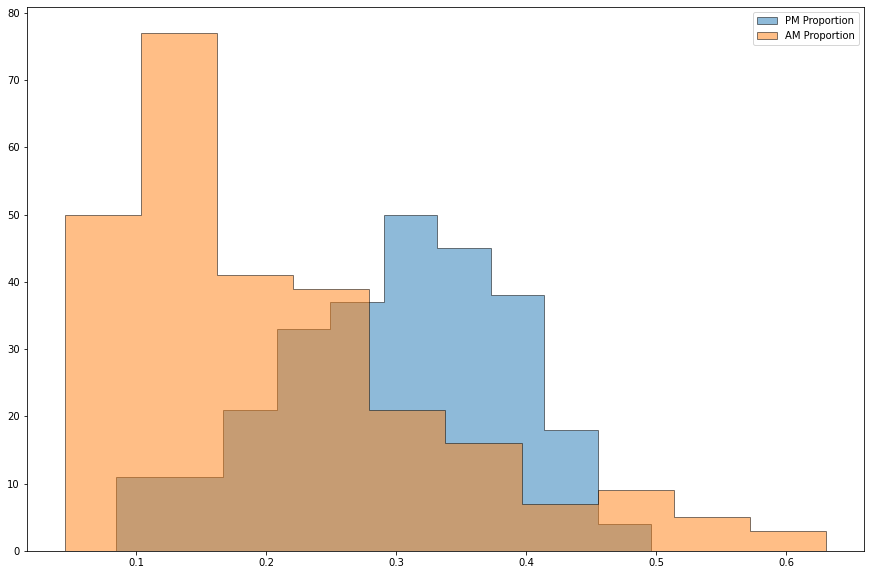

In [45]:
plt.figure(figsize=(15,10))
plt.hist(peak_counts.PM_prop, alpha=0.5, edgecolor='black', histtype='stepfilled')
plt.hist(peak_counts.AM_prop, alpha=0.5, edgecolor='black', histtype='stepfilled')
plt.legend(['PM Proportion', 'AM Proportion'])
plt.show()

Below, I have classified all the stations into a class of either 'work', 'residential' or 'other'. My method of differentiation was to calculate the difference between the AM and PM proportions. If the AM proportion was greater than the PM by 0.1 or more, the station is classified as 'work' and vice versa for 'residential'. The station is classified as 'other' if they are within a distance of 0.1 of each other. 'Other' stations usually correlate to tourist areas such as Leicester Square or Embankment which may see a similar amount of traffic both in the morning and evening. 

In [47]:
peak_counts['class'] = peak_counts.apply(lambda row: 'work' if row['AM_prop'] - row['PM_prop'] > 0.10 else ('residential' if 
                                    row['PM_prop'] - row['AM_prop'] > 0.10 else 'other'), axis=1)
peak_counts

,AM_peak,PM_peak,AM_prop,PM_prop,total,class
Station,,,,,,
Acton Town,1970,2628,0.210425,0.280709,9362,other
Aldgate,7408,2992,0.459098,0.185424,16136,work
Aldgate East,7618,3803,0.359238,0.179336,21206,work
Alperton,856,1847,0.167253,0.360883,5118,residential
Amersham,424,1465,0.108579,0.375160,3905,residential
...,...,...,...,...,...,...
Wimbledon Park,497,1114,0.150789,0.337985,3296,residential
Wood Green,2165,6494,0.114013,0.341987,18989,residential
Wood Lane,1798,1766,0.272012,0.267171,6610,other


Below I have grouped and counted the number of stations and their assigned class. It agrees with my analysis higher up that there are more residential than work related tube stations, with other sitting somewhere in between. This may be why the PM histogram is more normally distributed, rather than being negatively skewed as may have been expected as the effect of 48 stations may not be an effective counterweight to the combined 220 residential and other stations. 

In [46]:
peak_counts_grp = peak_counts.groupby('class')['total'].count().reset_index()
peak_counts_grp

,class,total
0,other,73
1,residential,147
2,work,48


Below, I have found a number of stations on the northern line that have differing classes. All the 'residential' stations exist within zones 3 and 4 (with High Barnet being in zone 5 at the very end of the line). All the 'work' stations are right next to one another within zone 1. Both of the 'other' stations are also within zone 1 but as mentioned previously they may be more popular among tourists than with workers so may see a similar amount of traffic throughout the entire day. In general, it can be inferred that 'residential' stations with a higher proportion of traffic in the PM are less likely to be based in zones 1 and 2 and vice versa with 'work' classed stations, that they are less likely to be based in zones 3 and higher.

In [28]:
northern_stations = ['Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate'
                    , 'High Barnet', 'Leicester Square', 'Morden', 'South Wimbledon'
                    , 'Tottenham Court Road', 'Warren Street']
northern_line = peak_counts.loc[northern_stations]
northern_line

,AM_peak,PM_peak,AM_prop,PM_prop,total,class
Station,,,,,,
Archway,2190,4106,0.157158,0.294654,13935,residential
Balham,2637,7635,0.119170,0.345038,22128,residential
Embankment,10692,8829,0.316509,0.261360,33781,other
Goodge Street,5374,1949,0.419287,0.152064,12817,work
Highgate,893,3170,0.100101,0.355341,8921,residential
High Barnet,987,2362,0.144235,0.345170,6843,residential
Leicester Square,8952,12915,0.187390,0.270347,47772,other
Morden,1550,5955,0.098852,0.379783,15680,residential
South Wimbledon,1335,2198,0.185494,0.305405,7197,residential
